# MODELS STATISTICS NOTEBOOK

Generates statistics and compares different models

# 1/Imports

In [1]:
# Imports
%matplotlib inline
import json
import os
import matplotlib.pyplot as plt
from AxonDeepSeg.testing.segmentation_scoring import *
import pickle
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.2)

from time import time
#from ipywidgets.widgets import *
from scipy.misc import imread, imsave

# 2/Choose models to compare

In [2]:
L_models_to_compare=['baseline_classic','conv3_rate112-48','conv3_rate112-48_last256']

# 3/ Computation of statistics

First, we compare the pixel-wise statistics of the different models: accuracy, pw-dice, mAP (per class, total)

In [3]:
pr_data={}
for model_name in L_models_to_compare:
    pr_data[model_name] = pickle.load( open( os.path.join('../models/',model_name,'pixel_wise_statistics.pkl'), "rb" ) )

Affichage du tableau comparatif

In [4]:
pw_stats=pd.DataFrame()
for model_name in L_models_to_compare:
    # Accuracy
    pw_stats.loc['Acc',str(model_name)]=pr_data[model_name]['total_acc']
    
    # Dice
    pw_stats.loc['mDice',str(model_name)]=pr_data[model_name]["dice"]['micro']
    pw_stats.loc['Dice_BG',str(model_name)]=pr_data[model_name]["dice"]['bg']
    pw_stats.loc['Dice_MY',str(model_name)]=pr_data[model_name]["dice"]['myelin']
    pw_stats.loc['Dice_AX',str(model_name)]=pr_data[model_name]["dice"]['axon']
    
    # AP-related metrics
    pw_stats.loc['mAP',str(model_name)]=pr_data[model_name]["mAP"]["micro"]
    pw_stats.loc['AP_BG',str(model_name)]=pr_data[model_name]["mAP"][0]
    pw_stats.loc['AP_MY',str(model_name)]=pr_data[model_name]["mAP"][1]
    pw_stats.loc['AP_AX',str(model_name)]=pr_data[model_name]["mAP"][2]
    

In [5]:
pw_stats

,baseline_classic,conv3_rate112-48,conv3_rate112-48_last256
Acc,0.839541,0.830547,0.829404
mDice,0.840181,0.831040,0.830352
Dice_BG,0.869230,0.867367,0.862120
Dice_MY,0.786277,0.774307,0.776363
Dice_AX,0.858098,0.841183,0.844249
mAP,0.931464,0.922277,0.915462
AP_BG,0.942828,0.932021,0.924236
AP_MY,0.897108,0.885639,0.878451
AP_AX,0.951006,0.945613,0.941088


Affichage des courbes d'AP

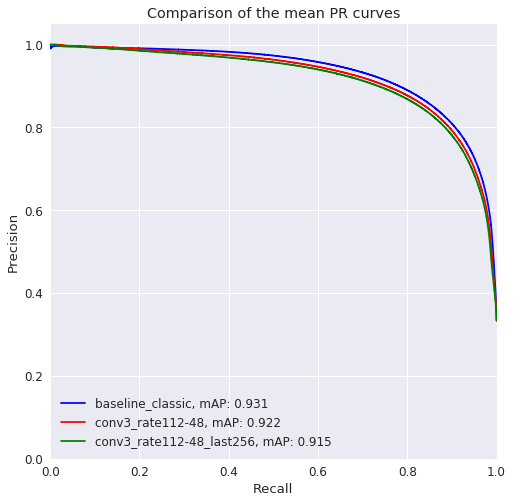

In [6]:
# Display the plots
plt.figure(figsize=(8,8))
L_colors=['b','r','g','k','gold','plum','darked']
for i, model_name in enumerate(L_models_to_compare):
    pr_data_model=pr_data[model_name]
    plt.step(pr_data_model['recall']['micro'], pr_data_model['precision']['micro'], color=L_colors[i], alpha=1.0,
         where='post',label=str(model_name)+', mAP: '+str(np.round(pr_data_model['mAP']['micro'],decimals=3)))
    
plt.legend(loc=0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparison of the mean PR curves')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

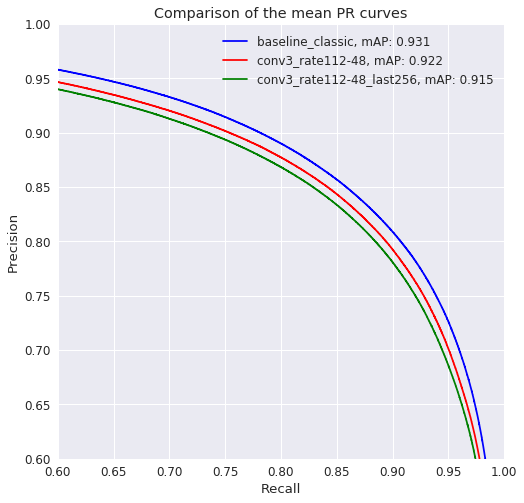

In [7]:
# Display the plots
plt.figure(figsize=(8,8))
L_colors=['b','r','g','k','gold','plum','darked']
for i, model_name in enumerate(L_models_to_compare):
    pr_data_model=pr_data[model_name]
    plt.step(pr_data_model['recall']['micro'], pr_data_model['precision']['micro'], color=L_colors[i], alpha=1,
         where='post',label=str(model_name)+', mAP: '+str(np.round(pr_data_model['mAP']['micro'],decimals=3)))
    
plt.legend(loc=0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparison of the mean PR curves')
plt.ylim([0.6, 1.0])
plt.xlim([0.6, 1.0])
plt.show()